In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
phase = 'exhaust'

In [12]:
from printer_anomaly_detection.model.cae import CAE
from pathlib import Path
import tensorflow as tf


project_path = Path('../../../../')

from printer_anomaly_detection.dataset.audio import Split, load_audio_dataset_split


dataset_path = project_path / 'datasets' / 'prints'

dataset = load_audio_dataset_split(dataset_path, phase, Split.TRAIN, window_size=256, step_size=8, scale=True)

In [13]:
img = list(dataset.take(1))[0]

2023-06-25 19:37:47.118800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


In [14]:
import numpy as np

np.min(img), np.max(img)

(2.9898967e-08, 1.0)

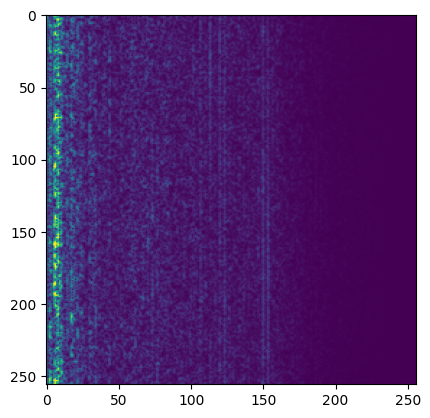

In [15]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [16]:
min = 1e10
max = -1e10

for x in dataset.batch(64):
    min = tf.math.minimum(min, tf.math.reduce_min(x))
    max = tf.math.maximum(max, tf.math.reduce_max(x))

2023-06-25 19:37:58.331184: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


KeyboardInterrupt: 

In [ ]:
min, max

(<tf.Tensor: shape=(), dtype=float32, numpy=-1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

: 